In [1]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from EVO import DeepNeuralNetwork, EvolutionOptimizer, LogisticRegression

device = torch.device("cuda" if torch.cuda.is_available()
                      else ("mps" if torch.backends.mps.is_available() else "cpu"))

transform = transforms.Compose([
    transforms.ToTensor(),                        # (1, 28, 28) in [0,1]
    transforms.Normalize((0.1307,), (0.3081,)),   # standard MNIST normalisation
    transforms.Lambda(lambda x: x.view(-1))       # flatten to (784,)
])

train_ds = datasets.MNIST(".", train=True,  download=True, transform=transform)
test_ds  = datasets.MNIST(".", train=False, download=True, transform=transform)

train_loader = DataLoader(train_ds, batch_size=128, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=1000)

In [10]:
# Model + Optimizer
model = DeepNeuralNetwork([784,16,10])
model.use_diversity_loss = False
optimizer = EvolutionOptimizer(model)
optimizer.set_population_size(100)
optimizer.use_backprop = True
optimizer.set_diversity_coeff(0.0)
optimizer.set_survivors_ratio(0.1)
optimizer.set_fitness_ratio(0.5)
optimizer.set_sneaker_prob(0)
optimizer.set_mutation_intensity(0.05)
optimizer.mutation_rate = 0.05

# Evolution loop
for generation in range(50):  # evolve for 10 generations
    for X, y in train_loader:
        optimizer.step(X, y)

    # Test accuracy
    correct = total = 0
    with torch.no_grad():
        for X, y in test_loader:
            X, y = X.to(model.device), y.to(model.device)   # Move to model's device
            preds = model.predict(X)
            correct += (preds == y).sum().item()
            total   += y.size(0)

    print(f"Generation {generation+1}, Test Accuracy: {100*correct/total:.2f}%")

Generation 1, Test Accuracy: 33.60%
Generation 2, Test Accuracy: 39.63%
Generation 3, Test Accuracy: 46.04%
Generation 4, Test Accuracy: 51.92%
Generation 5, Test Accuracy: 55.13%
Generation 6, Test Accuracy: 61.00%
Generation 7, Test Accuracy: 60.81%
Generation 8, Test Accuracy: 64.53%
Generation 9, Test Accuracy: 66.51%
Generation 10, Test Accuracy: 66.06%
Generation 11, Test Accuracy: 69.07%
Generation 12, Test Accuracy: 68.62%
Generation 13, Test Accuracy: 64.64%
Generation 14, Test Accuracy: 71.88%
Generation 15, Test Accuracy: 71.73%
Generation 16, Test Accuracy: 73.42%
Generation 17, Test Accuracy: 71.60%
Generation 18, Test Accuracy: 74.33%
Generation 19, Test Accuracy: 74.84%
Generation 20, Test Accuracy: 73.21%


KeyboardInterrupt: 

In [ ]:
!nvidia-smi

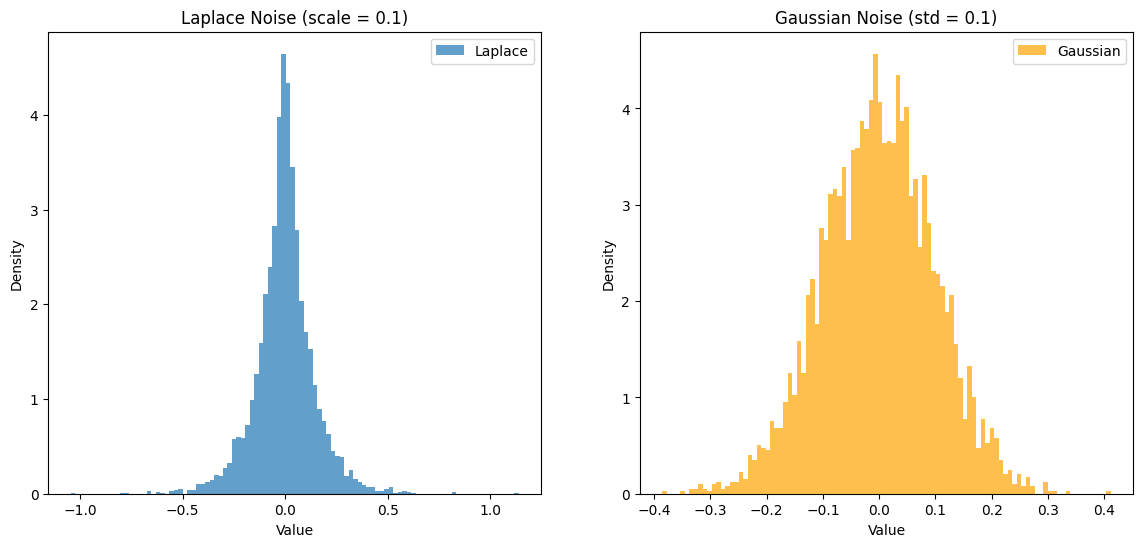

({'mean': -0.002285860013216734,
  'std': 0.1433315873146057,
  'min': -1.046592116355896,
  'max': 1.1399091482162476},
 {'mean': -0.0014646044000983238,
  'std': 0.0992639809846878,
  'min': -0.3852318227291107,
  'max': 0.4116326868534088})

In [9]:
import torch
import matplotlib.pyplot as plt

# Mutation parameters
mutation_intensity = 0.1
sample_size = 5000  # reduced from 10000 to avoid memory issues

# Generate Laplace and Gaussian noise
laplace_noise = torch.distributions.Laplace(loc=0.0, scale=mutation_intensity).sample((sample_size,))
gaussian_noise = torch.normal(mean=0.0, std=mutation_intensity, size=(sample_size,))

# Plot histograms
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(laplace_noise.numpy(), bins=100, density=True, alpha=0.7, label="Laplace")
plt.title("Laplace Noise (scale = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(gaussian_noise.numpy(), bins=100, density=True, alpha=0.7, color="orange", label="Gaussian")
plt.title("Gaussian Noise (std = 0.1)")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend()

plt.show()

# Return basic statistics
laplace_stats = {
    "mean": laplace_noise.mean().item(),
    "std": laplace_noise.std().item(),
    "min": laplace_noise.min().item(),
    "max": laplace_noise.max().item(),
}
gaussian_stats = {
    "mean": gaussian_noise.mean().item(),
    "std": gaussian_noise.std().item(),
    "min": gaussian_noise.min().item(),
    "max": gaussian_noise.max().item(),
}

laplace_stats, gaussian_stats

In [ ]:
!git add .